<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Juypter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Ice-age dynamics: 3. Dating
## Decay as random process
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In this notebook, we describe **single decay** as a **random process**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

from matplotlib.colors import ListedColormap
N = 2
vals = np.ones((N, 4))
vals[0,0] = 1
vals[0,1] = 0
vals[0,2] = 0
vals[1,0] = 0
vals[1,1] = 0
vals[1,2] = 1
newcmp = ListedColormap(vals)

## Problem statement

We cannot predict, which isotope is decaying first, and which next. Decay is a **random stochastic process**.

We will simulate a bnch of isotopes, which decay randomly, and compare the result to out solution
for single decay.

## Define geometry

- As a first step, we define the grid dimensions $N_x$ and $N_y$. 
- We then create coordinate arrays,
$x_i, i=1,N_x$, $y_j, j=1,N_y$ using the *numpy* module `linspace`. 
- We group the 1D coordinate arrays into two-dimensional
arrays $X_{i,j}, i=1,N_x, j=1,N_y$ and $Y_{i,j}, i=1,N_x, j=1,N_y$, 
using the `numpy` module `meshgrid`.
- Each point is an **isotope**. The isostope has a state `state`, either 0-parent or 1-daughter.


Finally, the array $decay_{i,j}$ holds a random number between $[0,100]$, a percentage value for decaying.

In [8]:
nx,ny = 11,11
# set linear mesh dimensions
x = np.linspace(0,1,nx)
print(x)
y = np.linspace(0,1,ny)
# create 2D mesh coordinates
X,Y = np.meshgrid(x,y)
print(X)
# set state (0-parent; 1-daughter)
state = np.zeros(nx*ny).reshape(ny,nx)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]


----
## Plot layout
We define the plot layout:
- A time axis for percentage of partent and daughter isotope concentrations.
- The 2D isotope plot

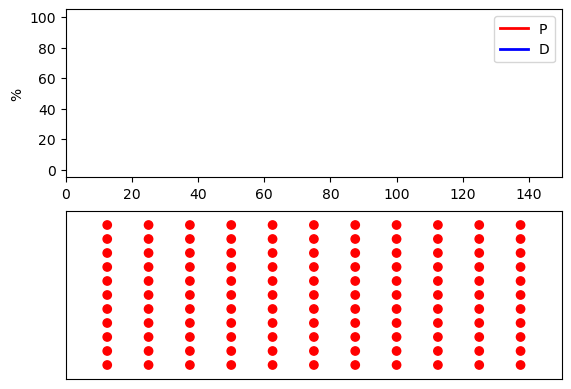

In [9]:
tmin = 0
tmax = 150

t = []
P = [];Psum=[]
D = [];Dsum=[]

# create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2,1)
# initialize two line objects (one in each axes)
line1, = ax1.plot([], [], lw=2,color='red',label='P')
line2, = ax1.plot([], [], lw=2,color='blue',label='D')
line3, = ax1.plot([], [], lw=0,marker='o',color='red')
line4, = ax1.plot([], [], lw=0,marker='o',color='blue')
lines = [line1,line2,line3,line4]

def init():
    # init layout
    ax1.set_xlim([tmin,tmax])
    ax1.set_ylim([-5,105])
    ax1.set_ylabel('%')
    ax1.legend()
    ax2.set_xlim([-0.1,1.1])
    ax2.set_ylim([-0.1,1.1])
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.scatter(X,Y,c=state,cmap=newcmp)
    line1.set_data(t,P)
    line2.set_data(t,D)
    line3.set_data(t,Psum)
    line4.set_data(t,Dsum)
    return lines

init()

----
## Random decay
We assign each isotope a random rumber between `0` and `100`,
a percentage value for decaying.

the decay is following a normal distribution.

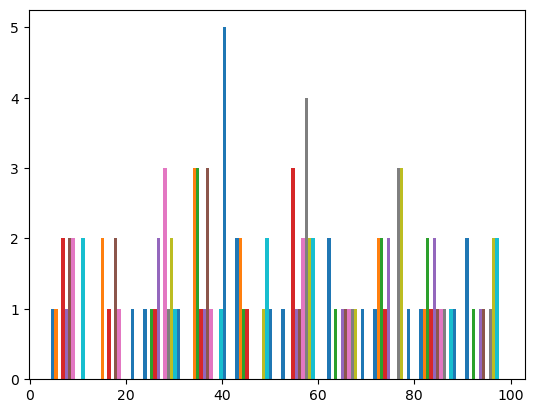

In [10]:
# assign probability of decay (0-100%)
decay = np.random.uniform(0,100,nx*ny).reshape(ny,nx)
_ = plt.hist(decay)

----
## Animation

In [12]:
thalf = 30

def run(frame):
    # update decay
    currentP = 100*np.exp(-np.log(2)*frame/thalf)
    currentD = 100*(1.-np.exp(-np.log(2)*frame/thalf))
    sumP=0; sumD=0
    for i in range(ny):
        for j in range(nx):
            if (state[i][j] == 0):
                sumP = sumP + 1
            if (state[i][j] == 1):
                sumD = sumD + 1
            
            #print(i,j,currentD,state[i][j])
            if (decay[i][j] < currentD):
                state[i][j] = 1
    sumP = 100*(sumP / (nx*ny))
    sumD = 100*(sumD / (nx*ny))
    #print(sumP,sumD)
    # update the data
    
    x,y1,y2 = frame,currentP,currentD
    t.append(x)
    P.append(y1)
    D.append(y2)
    Psum.append(sumP)
    Dsum.append(sumD)
    line1.set_data(t,P)
    line2.set_data(t,D)
    line3.set_data(t,Psum)
    line4.set_data(t,Dsum)
    ax2.scatter(X,Y,c=state,cmap=newcmp)
              
    return lines

In [13]:
# run animation sequence
ani = animation.FuncAnimation(fig,run,frames=np.linspace(tmin,tmax,21),init_func=init,blit=True,repeat=False)

In [14]:
print(ani)

In [15]:
HTML(ani.to_jshtml())

----